In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [188]:
file = ('C:\\Users\\mjjyo\\OneDrive\\Desktop\\openavenuesmicrointernship\\open_ave_data.csv')
file = pd.read_csv(file)

In [189]:
file.dropna()

,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.
3,3,Exam: - CHEST-PORTABLE History: Chest pain Com...,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear
4,4,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.
...,...,...,...,...,...,...
949,982,CHEST RADIOGRAPH: PA and Lateral views HISTORY...,LUNGS: The lung fields demonstrate normal degr...,HISTORY: R05 Cough \n\n,CHEST RADIOGRAPH: PA and Lateral views\n\nCOMP...,IMPRESSION: No acute pulmonary disease.
950,983,EXAM DESCRIPTION: X-ray single view chest. CLI...,FINDINGS: The lungs are well expanded and are ...,"CLINICAL HISTORY: 68 years Male, SOB \n\n",EXAM DESCRIPTION: X-ray single view chest.\n\n...,IMPRESSION: No evidence of acute intrathoracic...
951,984,EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Chest pain. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...,IMPRESSION: Normal single view chest.
952,985,EXAM: XR CHEST 1 VW HISTORY: chest pain TECHNI...,FINDINGS: Lines and tubes: None Cardiomediasti...,HISTORY: chest pain \n\n,EXAM: XR CHEST 1 VW\n\nTECHNIQUE: Chest AP vie...,IMPRESSION: No acute cardiopulmonary process D...


In [190]:
#files to do idf on
exam_names = file['ExamName'].dropna().tolist()
print(len(exam_names))

impressions= file['impression'].dropna().tolist()
print(len(impressions))

findings = file['findings'].dropna().tolist()
print(len(findings))

clinical_data = file['clinicaldata'].dropna().tolist()
print(len(clinical_data))


954
954
954
950


In [191]:
#list of corpus
corpus = exam_names + impressions + findings + clinical_data


In [192]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['00', '01', '02', ..., 'your', 'zip', 'zone'], dtype=object)

In [193]:
print(X.shape)

(3812, 1083)


In [194]:
X.toarray()

array([[0.        , 0.32614224, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [195]:
import numpy as np
from sklearn.model_selection import train_test_split
X.shape

(3812, 1083)

In [196]:
height = 3812
y = pd.DataFrame(0, index=range(height), columns=range(1))

In [197]:
y.shape

y.loc[0:953] = 'ExamName'
y.loc[954:1907] = 'impression'
y.loc[1908:2861] = 'findings'
y.loc[2862:3812] = 'clinicaldata'


In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [199]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3 ,
                                                    random_state=1234)


In [200]:
lr_model = LogisticRegression(random_state=1234)
param_dict = {'C': [0.001, 0.01, 0.1, 1, 10],
             'solver': ['sag', 'lbfgs', 'saga']}

In [201]:
grid_search = GridSearchCV(lr_model, param_dict)
grid_search.fit(x_train, y_train.values.ravel())
display(grid_search.best_params_)
print("Cross-Validated Score of the Best Estimator: %.3f" % grid_search.best_score_)


C:\Users\mjjyo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mjjyo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mjjyo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mjjyo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mjjyo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mjjyo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

{'C': 10, 'solver': 'saga'}

Cross-Validated Score of the Best Estimator: 0.999


In [202]:
lr=LogisticRegression(C=1, solver ='saga')
lr.fit(x_train, y_train.values.ravel())
lr_preds = lr.predict(x_test)

In [203]:

print(confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))
print("Accuracy Score: %.3f" % accuracy_score(y_test, lr_preds))

[[283   0   0   0]
 [  0 294   0   0]
 [  0   0 296   1]
 [  0   0   0 270]]
              precision    recall  f1-score   support

    ExamName       1.00      1.00      1.00       283
clinicaldata       1.00      1.00      1.00       294
    findings       1.00      1.00      1.00       297
  impression       1.00      1.00      1.00       270

    accuracy                           1.00      1144
   macro avg       1.00      1.00      1.00      1144
weighted avg       1.00      1.00      1.00      1144

Accuracy Score: 0.999


In [204]:
cm = confusion_matrix(y_test, lr_preds)
score = accuracy_score(y_test, lr_preds)

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy Score 0.9991258741258742')

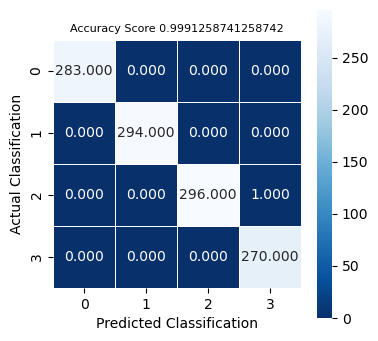

In [206]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=0.5, square=
           True, cmap='Blues_r')
plt.ylabel('Actual Classification')
plt.xlabel('Predicted Classification')
all_sample_title = f'Accuracy Score {score}'
plt.title(all_sample_title, size=8)